In [1]:
#import important libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import missingno as msno
import statistics
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
#import CSV file
med_data = pd.read_csv("~/Downloads/d206-medical/medical_raw_data.csv")

# 1. Duplicates

In [3]:
#find and treat duplicates
print(med_data.duplicated().value_counts())
print(med_data.duplicated('Customer_id', keep=False).value_counts())
print(med_data.duplicated('Interaction', keep=False).value_counts())
print(med_data.duplicated('UID', keep=False).value_counts())

False    10000
dtype: int64
False    10000
dtype: int64
False    10000
dtype: int64
False    10000
dtype: int64


# 2. Missing Values

<Axes: >

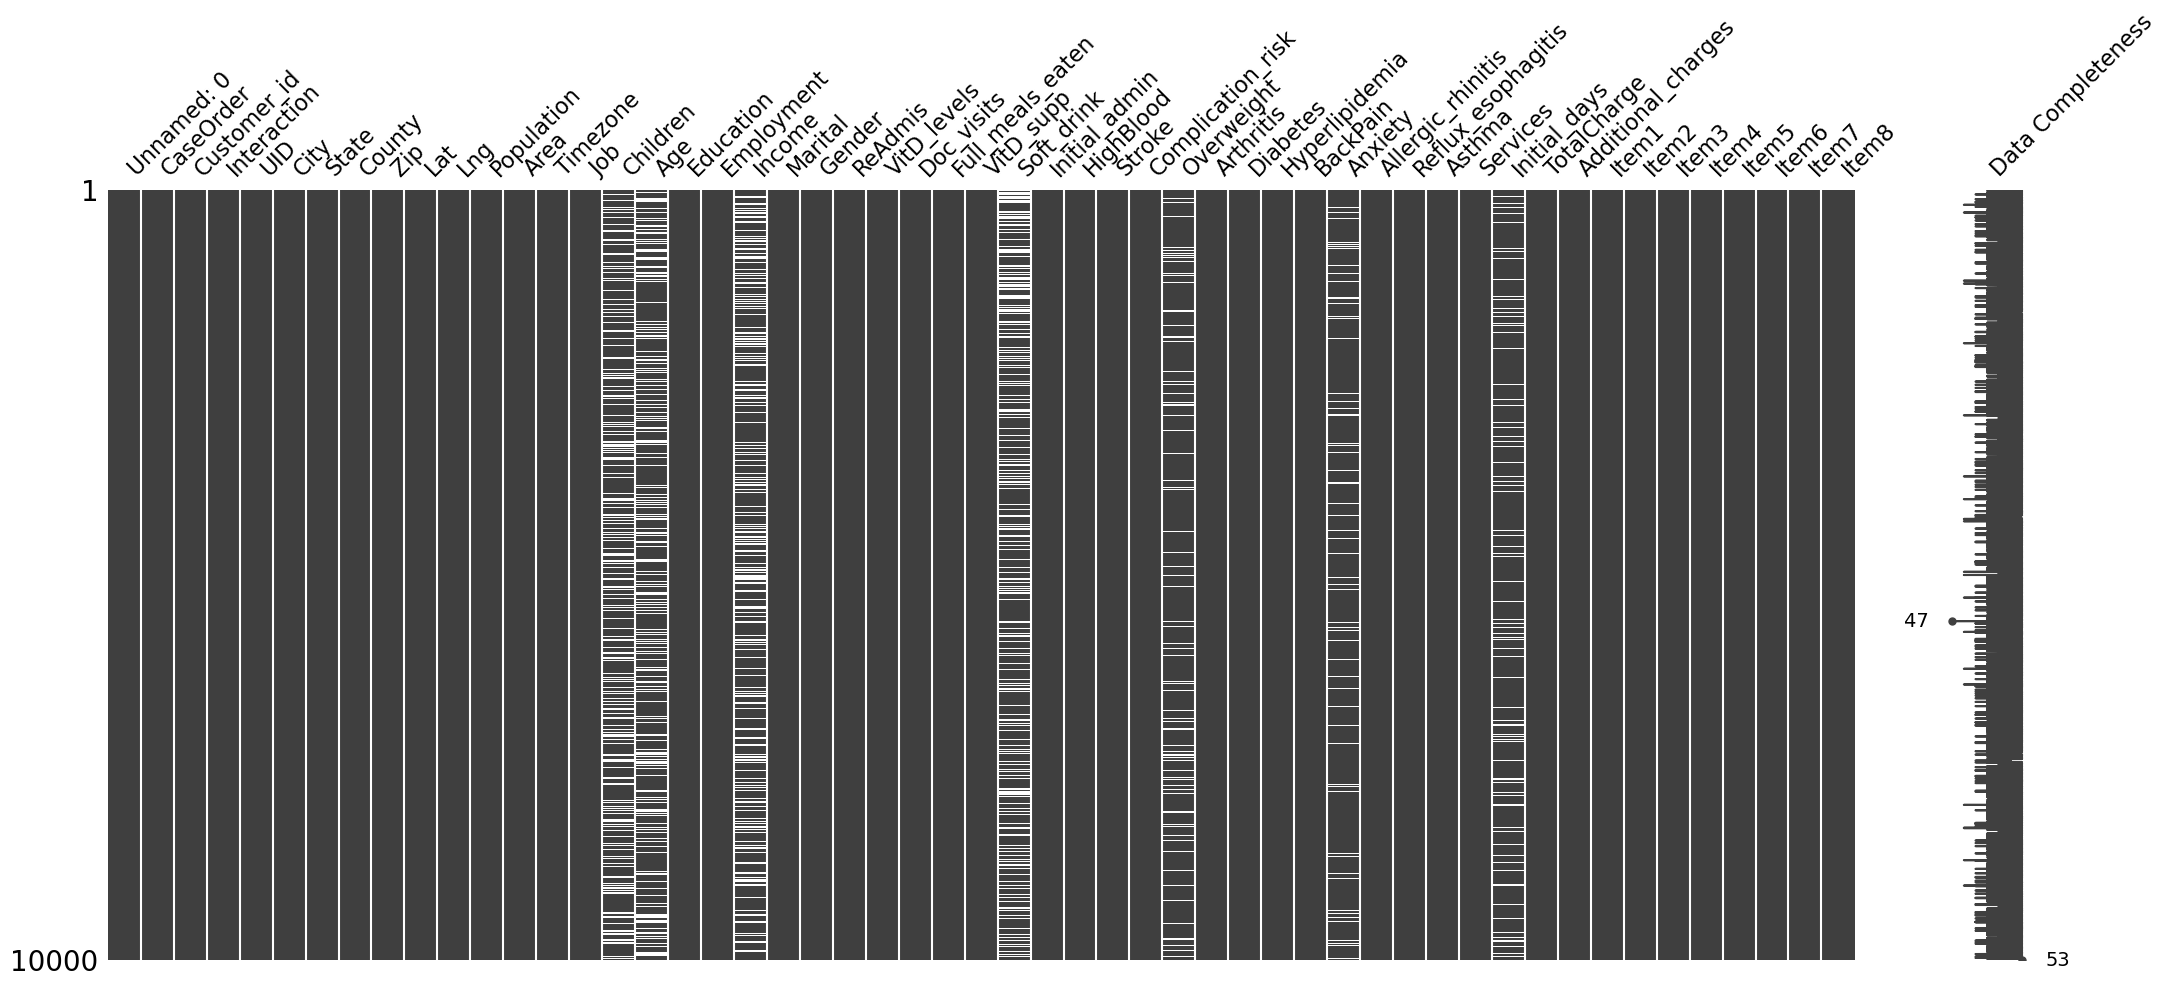

In [4]:
#find missing values using msno matrix
msno.matrix(med_data, labels=True)

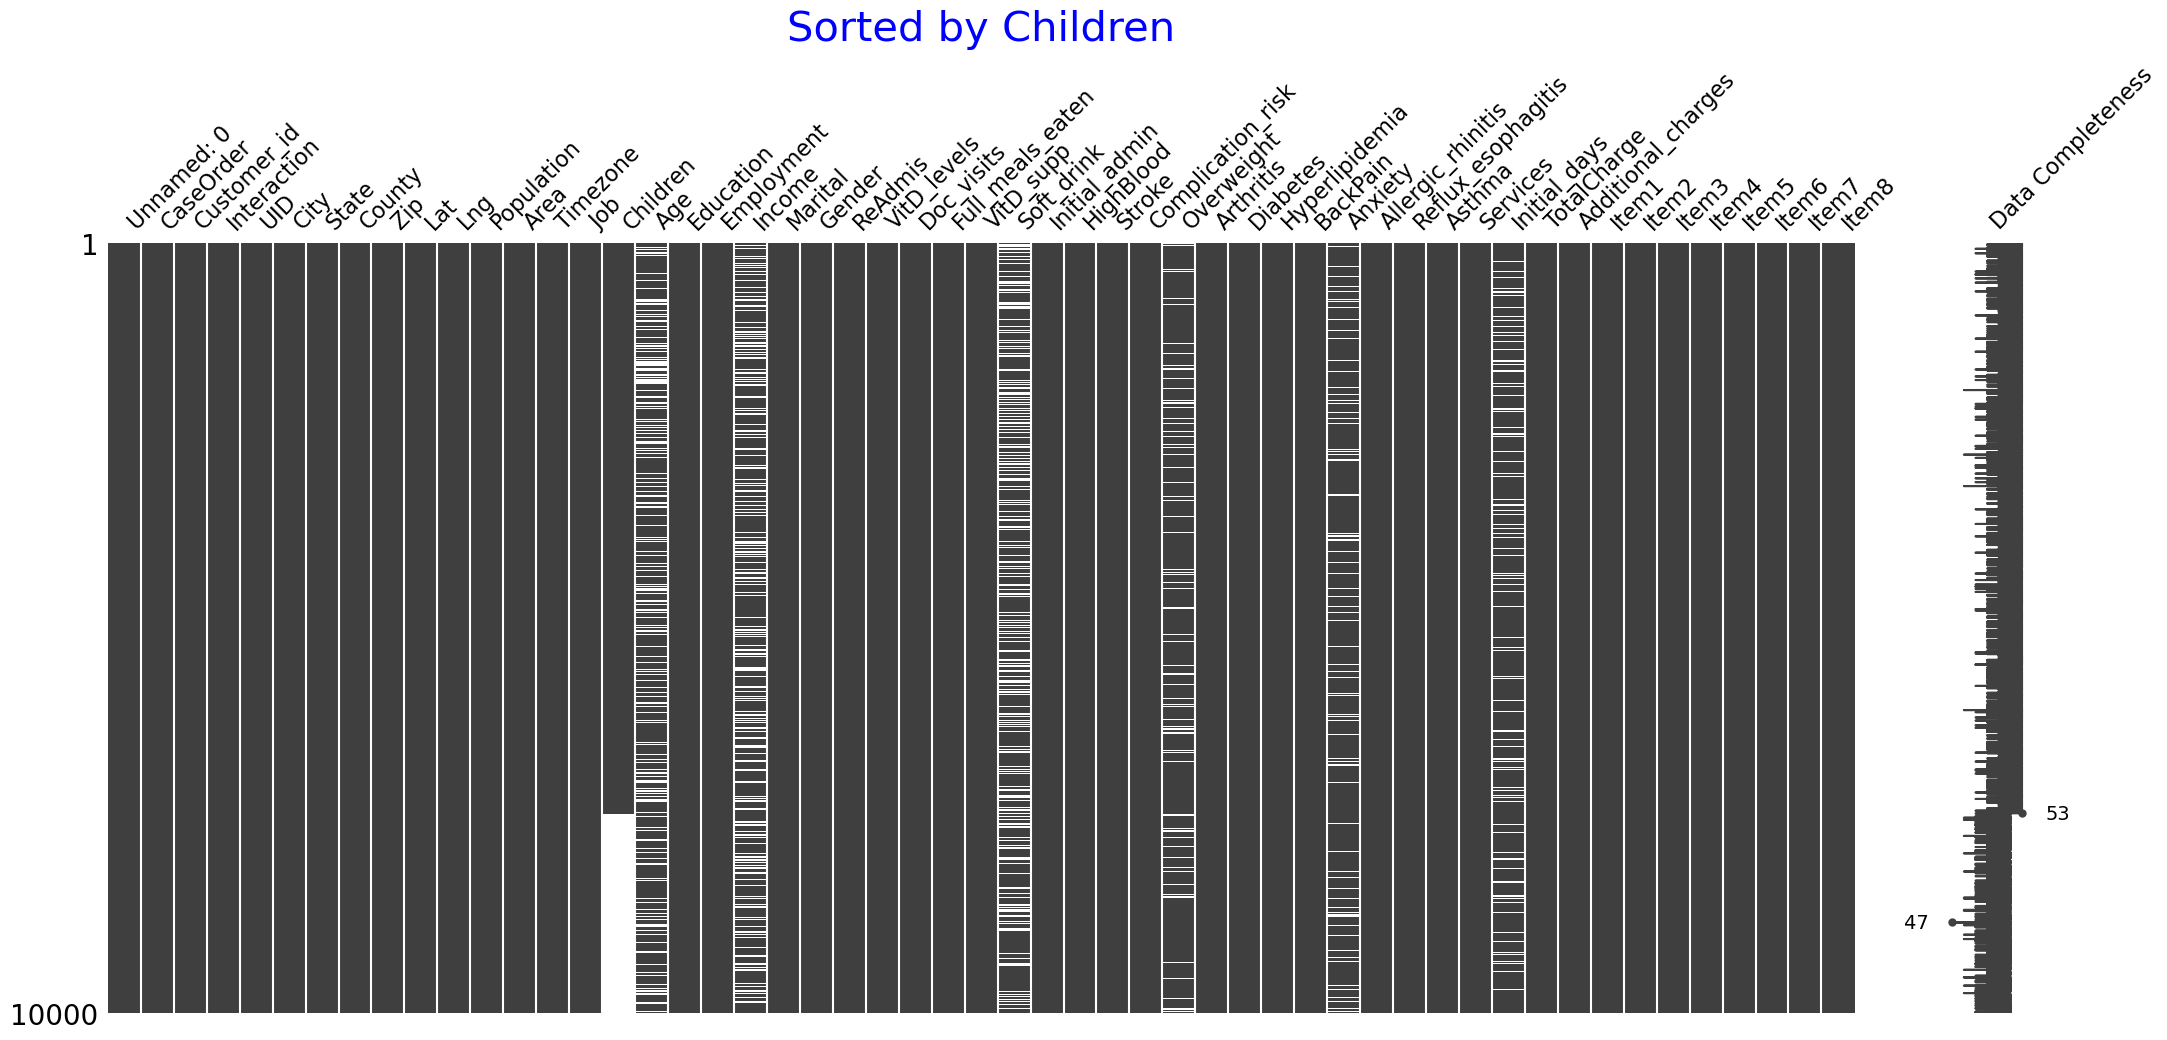

In [5]:
#sort msno matrix by Children
sorted_chl = med_data.sort_values('Children')
msno.matrix(sorted_chl, labels=True)
plt.title('Sorted by Children', fontsize=30, pad=20, color='blue')
plt.show()

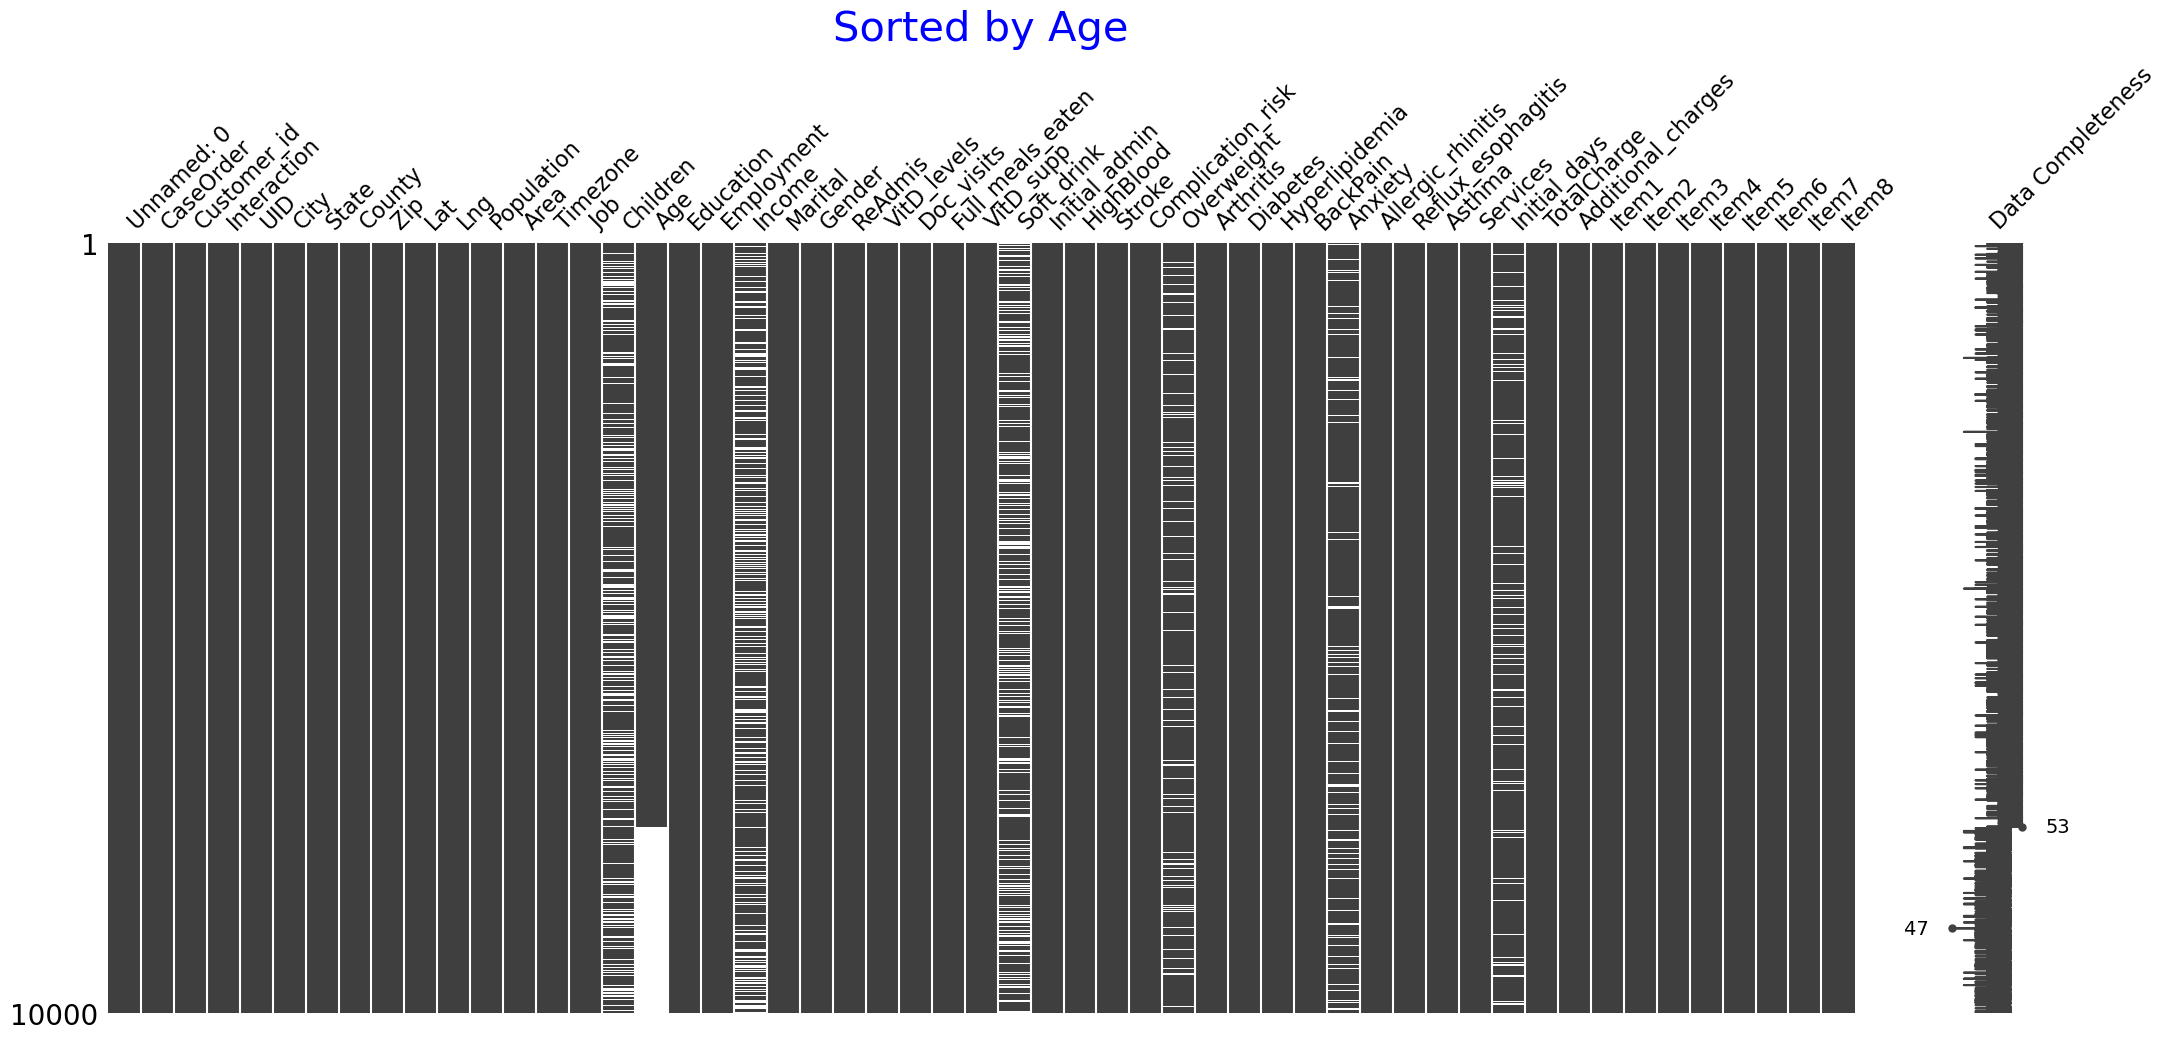

In [6]:
#sort msno matrix by Age
sorted_age = med_data.sort_values('Age')
msno.matrix(sorted_age, labels=True)
plt.title('Sorted by Age', fontsize=30, pad=20, color='blue')
plt.show()

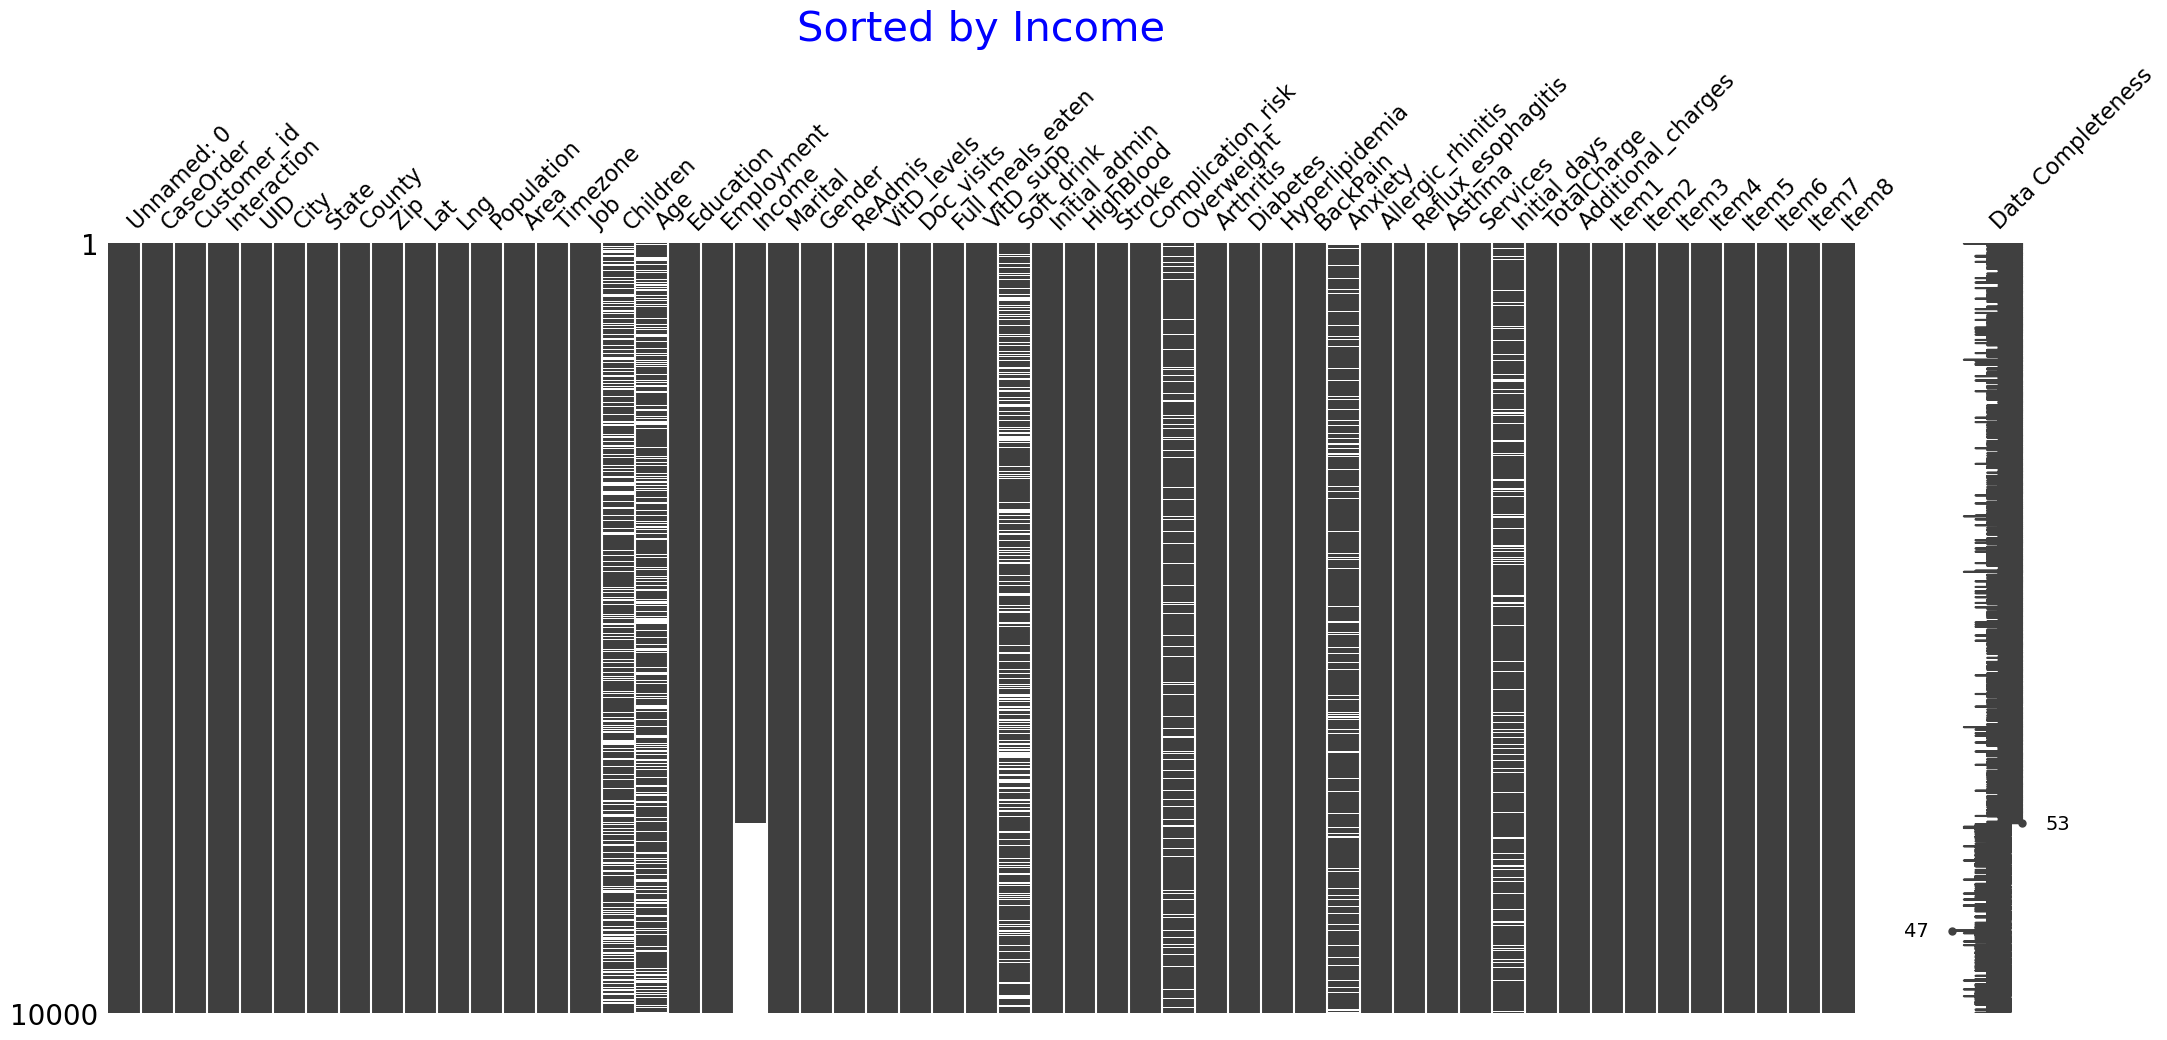

In [7]:
#sort msno matrix by Income
sorted_inc = med_data.sort_values('Income')
msno.matrix(sorted_inc, labels=True)
plt.title('Sorted by Income', fontsize=30, pad=20, color='blue')
plt.show()

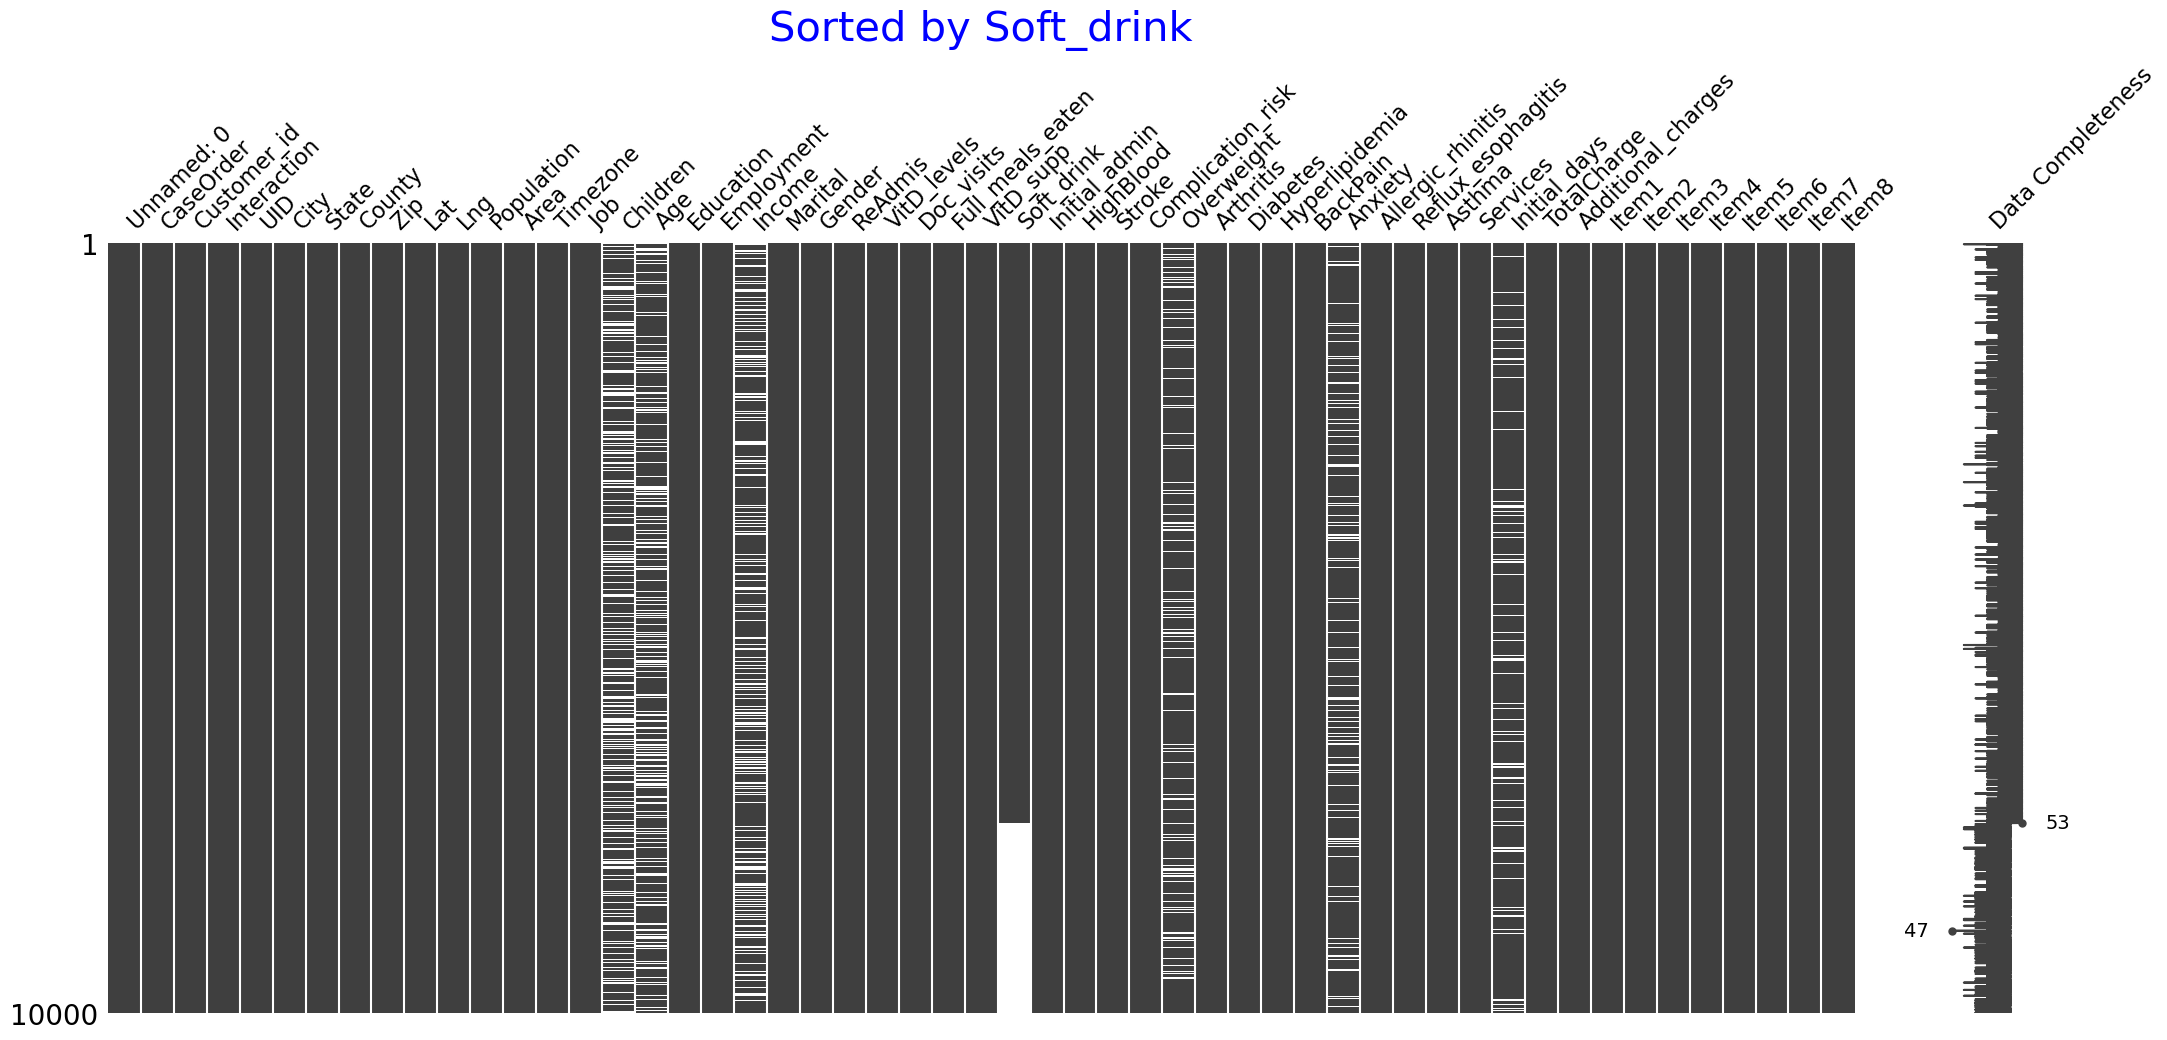

In [8]:
#sort msno matrix by Soft_drink
sorted_soft = med_data.sort_values('Soft_drink')
msno.matrix(sorted_soft, labels=True)
plt.title('Sorted by Soft_drink', fontsize=30, pad=20, color='blue')
plt.show()

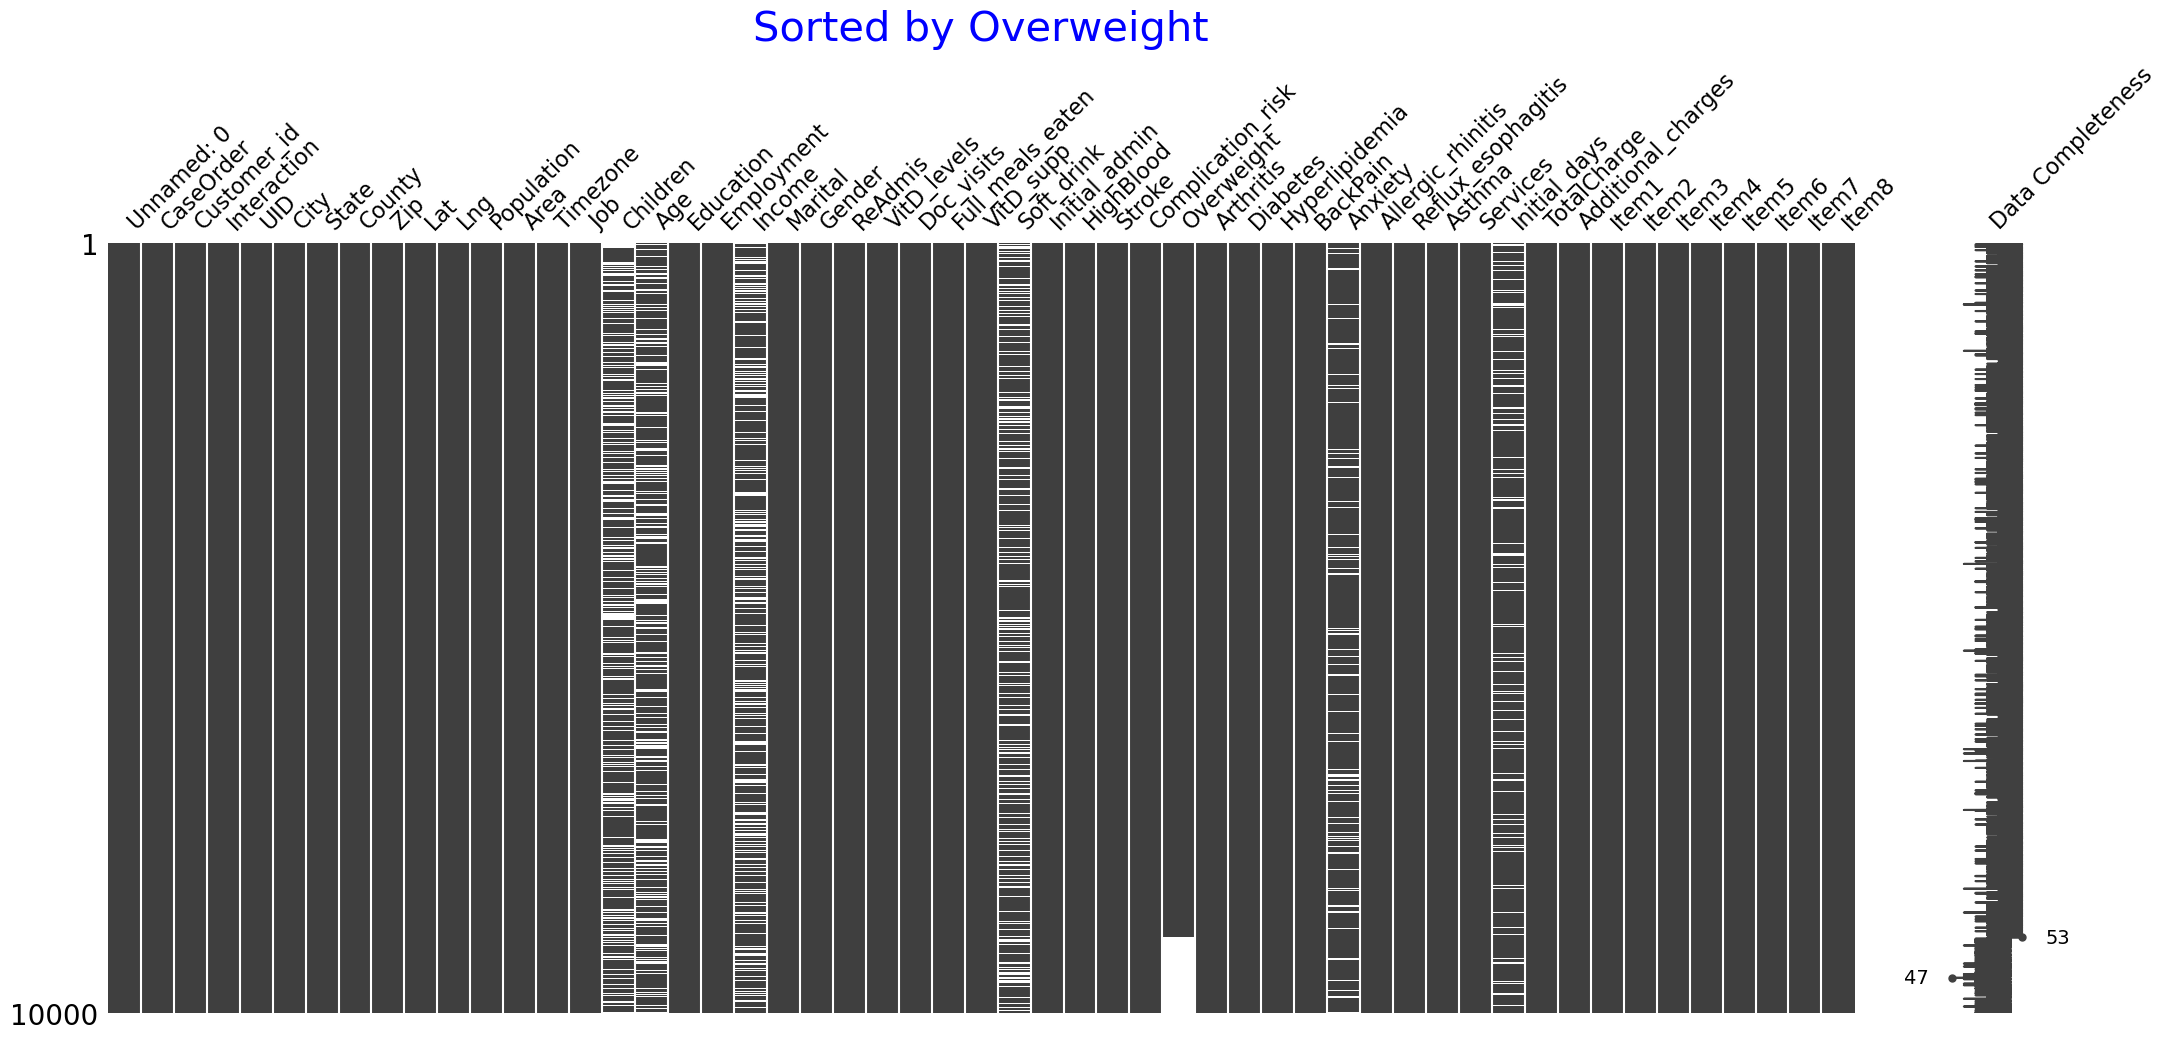

In [9]:
#sort msno matrix by Overweight
sorted_over = med_data.sort_values('Overweight')
msno.matrix(sorted_over, labels=True)
plt.title('Sorted by Overweight', fontsize=30, pad=20, color='blue')
plt.show()

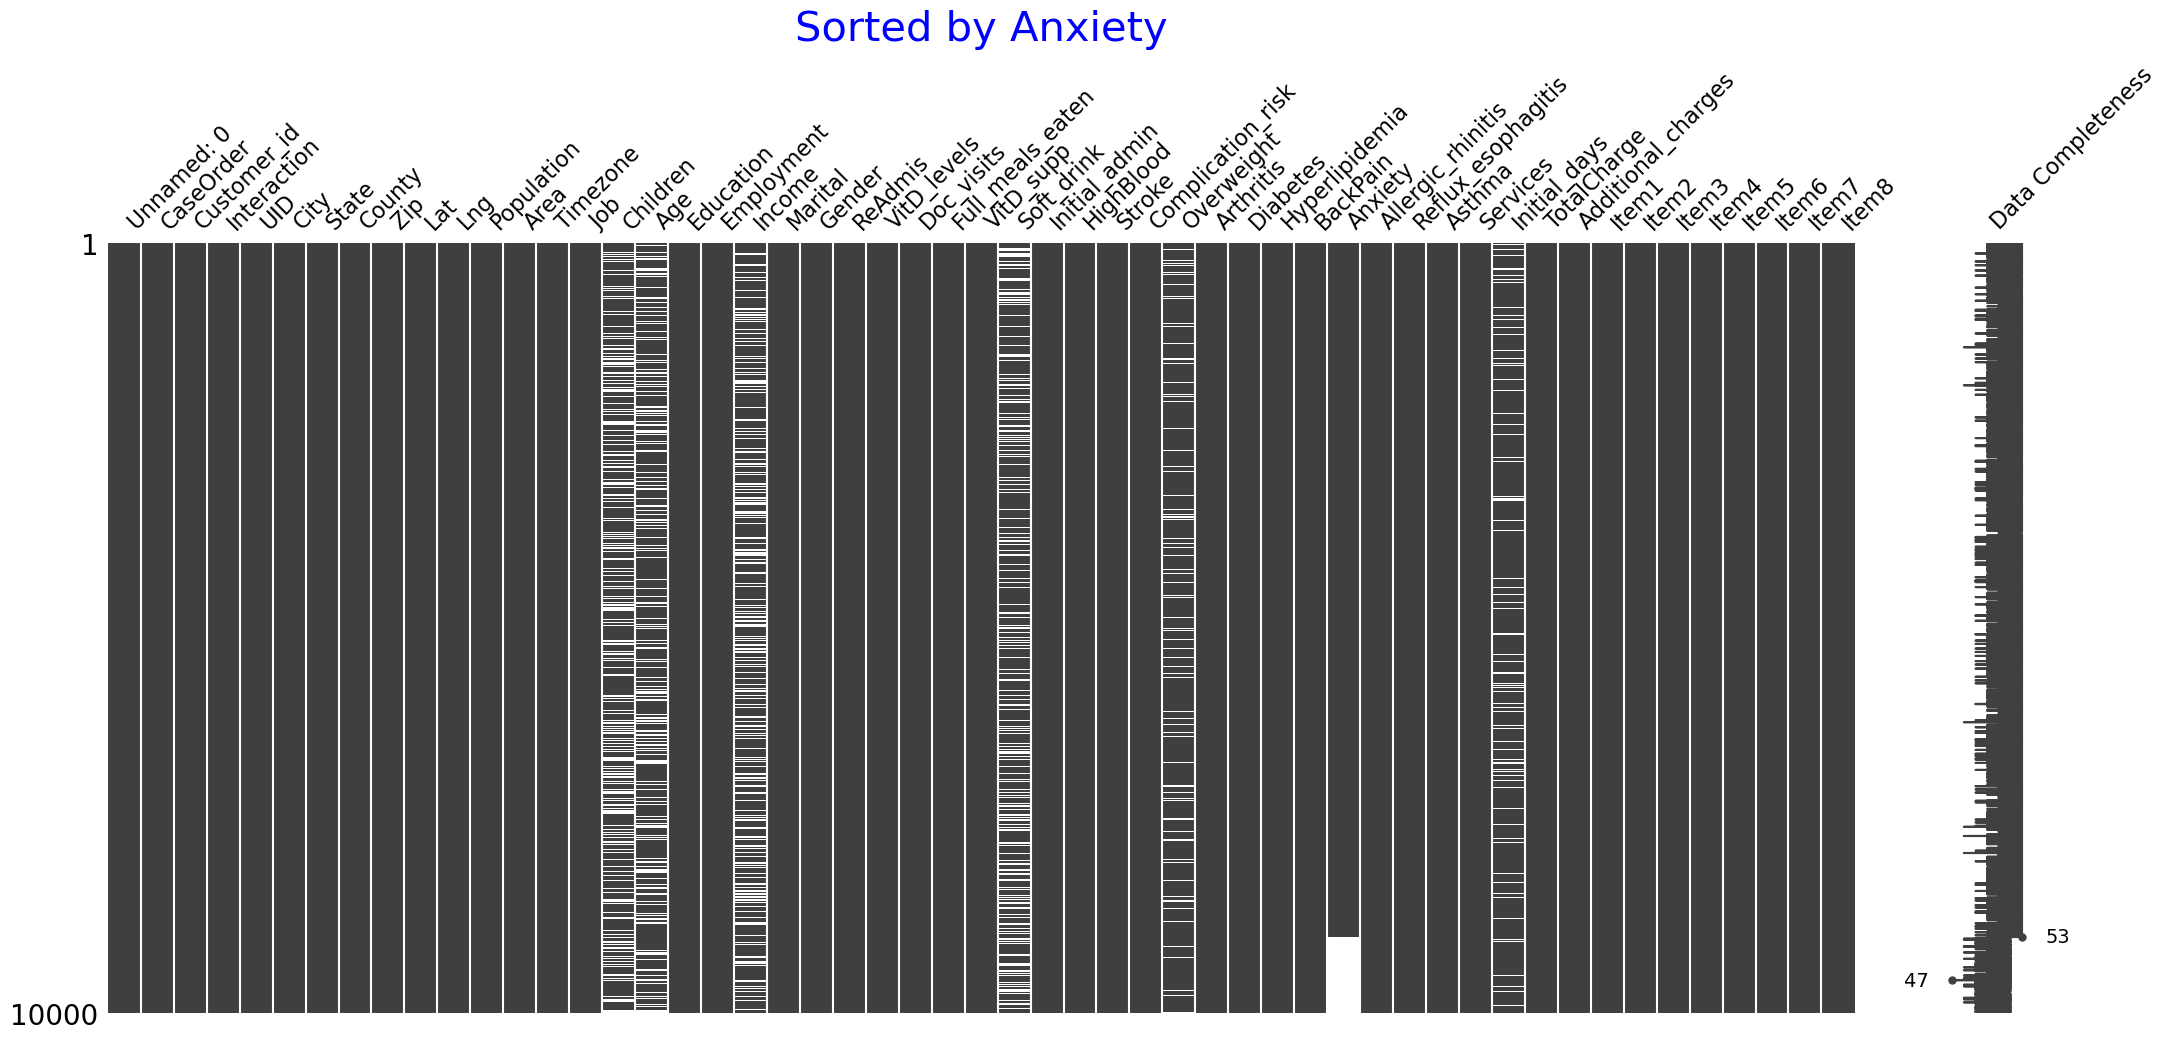

In [10]:
#sort msno matrix by Anxiety
sorted_anx = med_data.sort_values('Anxiety')
msno.matrix(sorted_anx, labels=True)
plt.title('Sorted by Anxiety', fontsize=30, pad=20, color='blue')
plt.show()

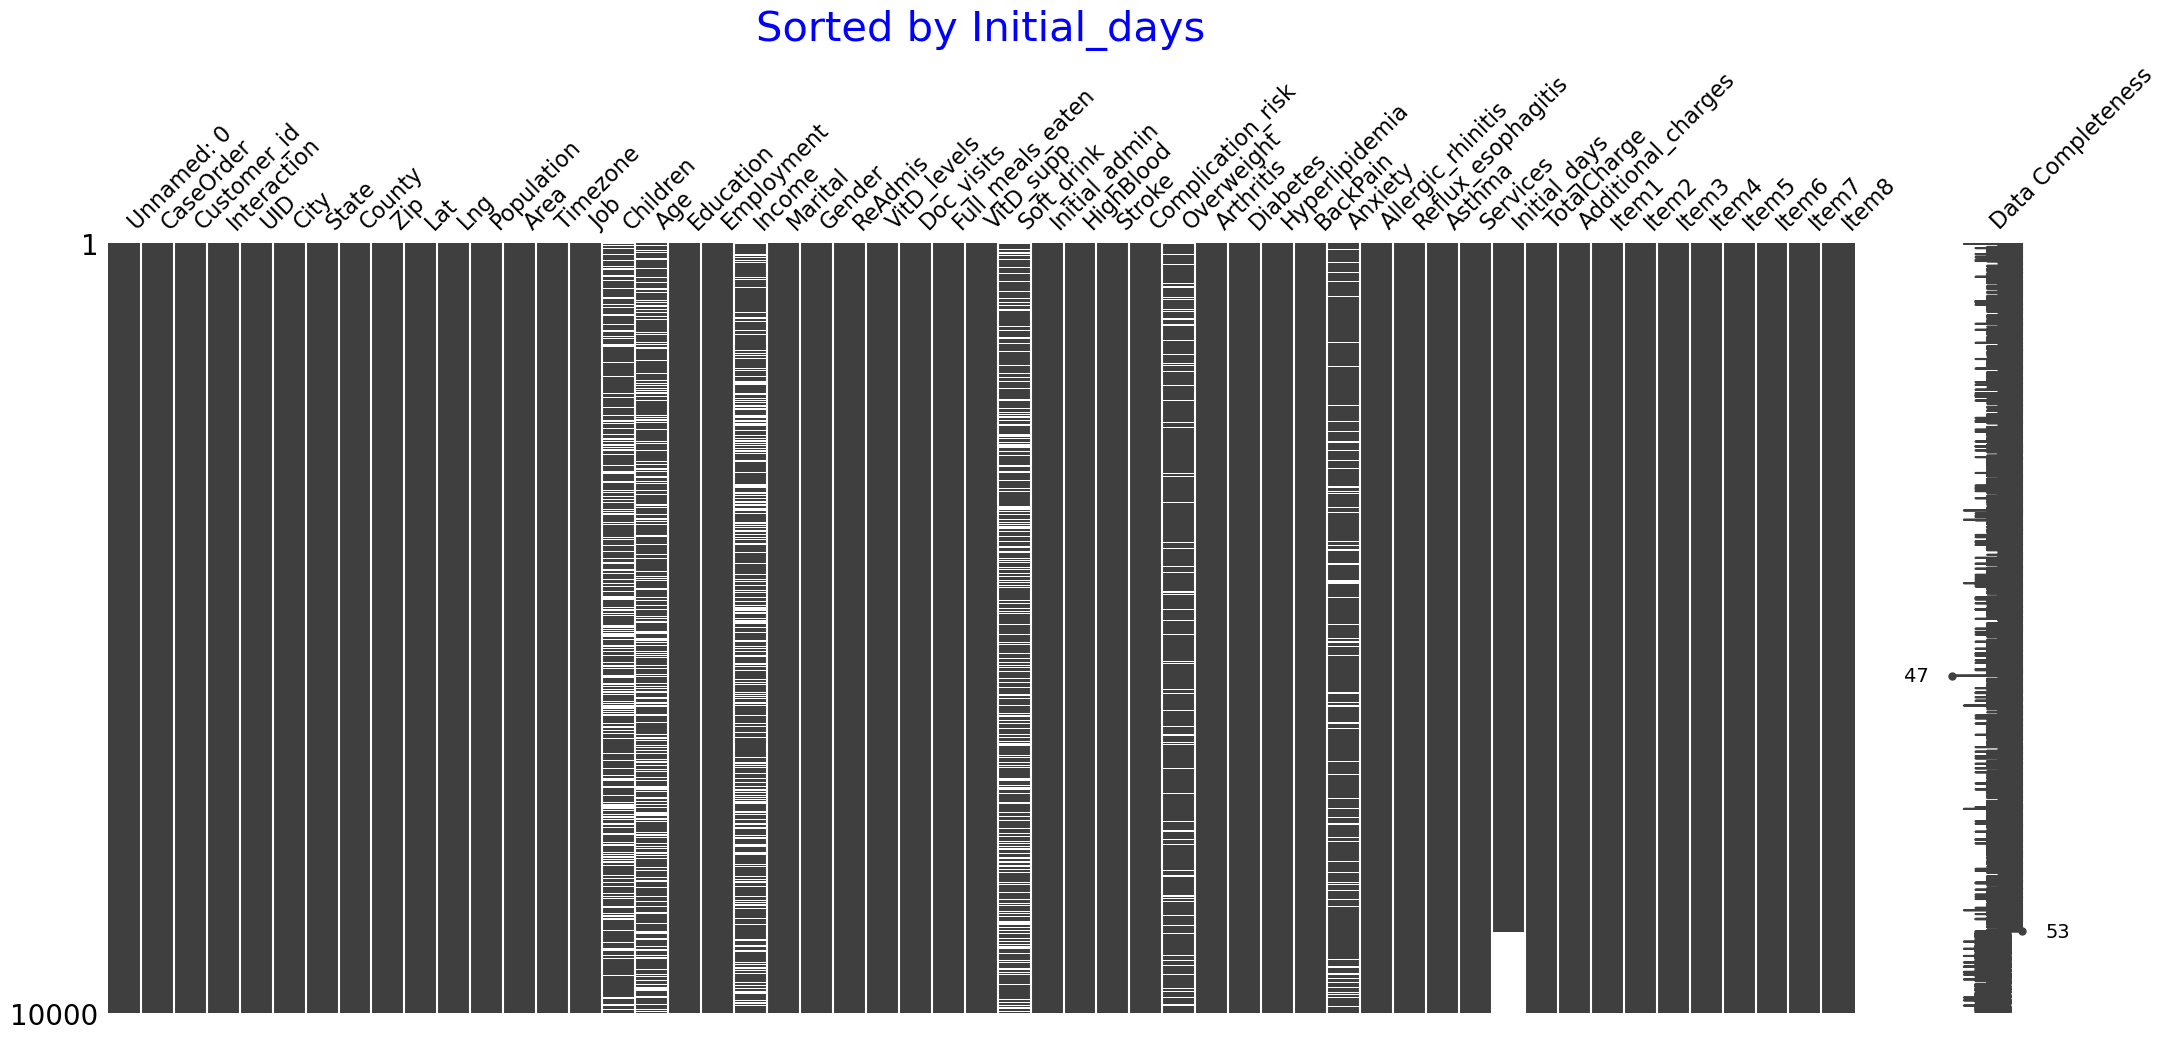

In [11]:
#sort msno matrix by Initial_days
sorted_ind = med_data.sort_values('Initial_days')
msno.matrix(sorted_ind, labels=True)
plt.title('Sorted by Initial_days', fontsize=30, pad=20, color='blue')
plt.show()

In [5]:
#total number of nulls
med_data_nullity = med_data[['Children', 'Age', 'Income', 'Soft_drink', 
                             'Overweight', 'Anxiety', 'Initial_days']].isnull()
print(med_data_nullity.sum())

Children        2588
Age             2414
Income          2464
Soft_drink      2467
Overweight       982
Anxiety          984
Initial_days    1056
dtype: int64


## 2.1 Missing Values - Soft_drink

In [6]:
# Univariate Statistical Imputation: Mode
print(med_data['Soft_drink'].value_counts())
print(med_data['Soft_drink'].unique())
med_data['Soft_drink'] = med_data['Soft_drink'].fillna(med_data['Soft_drink'].mode()[0])
print(med_data['Soft_drink'].value_counts())
print(med_data['Soft_drink'].unique())

No     5589
Yes    1944
Name: Soft_drink, dtype: int64
[nan 'No' 'Yes']
No     8056
Yes    1944
Name: Soft_drink, dtype: int64
['No' 'Yes']


## 2.2 Missing Values - Anxiety

In [7]:
# Univariate Statistical Imputation: Mode
print(med_data['Anxiety'].value_counts())
print(med_data['Anxiety'].unique())
med_data['Anxiety'] = med_data['Anxiety'].fillna(med_data['Anxiety'].mode()[0])
print(med_data['Anxiety'].value_counts())
print(med_data['Anxiety'].unique())

0.0    6110
1.0    2906
Name: Anxiety, dtype: int64
[ 1. nan  0.]
0.0    7094
1.0    2906
Name: Anxiety, dtype: int64
[1. 0.]


## 2.3 Missing Values - Overweight

In [8]:
# Univariate Statistical Imputation: Mode
print(med_data['Overweight'].value_counts())
print(med_data['Overweight'].unique())
med_data['Overweight'] = med_data['Overweight'].fillna(med_data['Overweight'].mode()[0])
print(med_data['Overweight'].value_counts())
print(med_data['Overweight'].unique())

1.0    6395
0.0    2623
Name: Overweight, dtype: int64
[ 0.  1. nan]
1.0    7377
0.0    2623
Name: Overweight, dtype: int64
[0. 1.]


In [ ]:
## Round dollar amounts to 2 decimal places

#med_data['TotalCharge'] = med_data['TotalCharge'].round(2)
#med_data['Additional_charges'] = med_data['Additional_charges'].round(2)
#print(med_data[['TotalCharge', 'Additional_charges']])

#saved this code for future courses

In [ ]:
## Update Zip to be 5 digits since data has trimmed off preceding zeros

#med_data['Zip'] = med_data['Zip'].astype('str').str.zfill(5)
#print(med_data['Zip'].sort_values())

#saved this code for future courses

## 2.4 Missing Values - Population

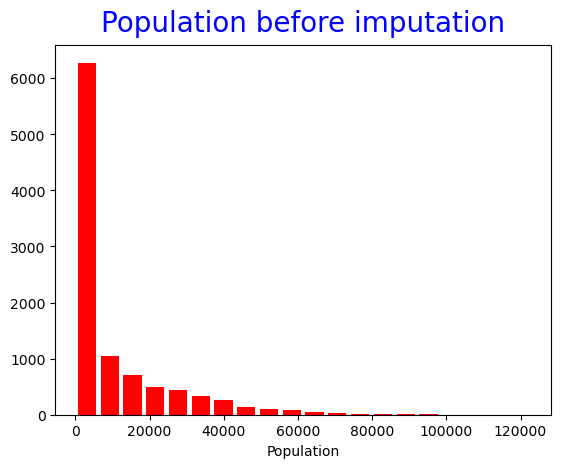

count     10000.000000
mean       9965.253800
std       14824.758614
min           0.000000
25%         694.750000
50%        2769.000000
75%       13945.000000
max      122814.000000
Name: Population, dtype: float64

In [16]:
#detect missing data in Population
#view histogram before & after to show unbiased treatment
plt.hist(med_data.Population, bins=20, rwidth=0.8, color='red')
plt.xlabel('Population')
plt.title('Population before imputation', fontsize=20, pad=10, color='blue')
plt.show()

med_data['Population'].describe()

In [9]:
#treat missing values in Population by imputing '0' with NaN, then applying median
med_data['Population'] = med_data['Population'].replace(0, np.nan)
med_data['Population'].fillna(med_data['Population'].median(), inplace=True)

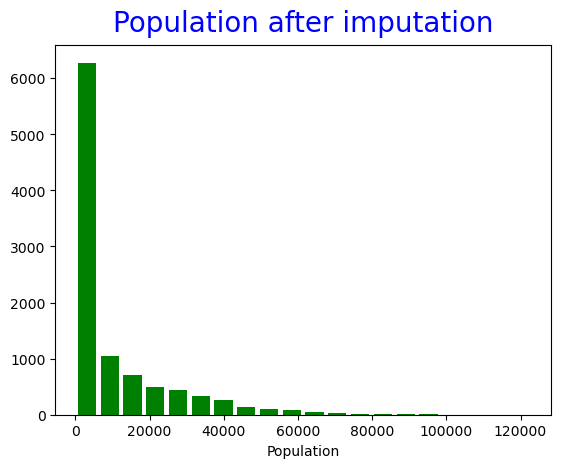

count     10000.000000
mean       9996.416900
std       14806.770155
min           1.000000
25%         743.000000
50%        2859.000000
75%       13945.000000
max      122814.000000
Name: Population, dtype: float64

In [18]:
#detect missing values in Population after treatment
plt.hist(med_data.Population, bins=20, rwidth=0.8, color='green')
plt.xlabel('Population')
plt.title('Population after imputation', fontsize=20, pad=10, color='blue')
plt.show()

med_data['Population'].describe()

## 2.5 Missing Values - Age

In [ ]:
#detect missing data in Age
#view histogram before & after to show unbiased treatment
plt.hist(med_data.Age, bins=10, rwidth=0.8, color='red')
plt.xlabel('Age')
plt.title('Age before imputation', fontsize=20, pad=10, color='blue')
plt.show()

med_data.Age.describe()

In [10]:
# treat missing values in Age
# METHOD = K-NEAREST NEIGHBOR & FORWARD FILL (FOR LAST VALUE)
med_data['Age'].interpolate(method='nearest', inplace=True)
med_data['Age'].interpolate(method='ffill', inplace=True)

In [ ]:
#detect missing values in Age after treatment
plt.hist(med_data.Age, bins=10, rwidth=0.8, color='green')
plt.xlabel('Age')
plt.title('Age after imputation', fontsize=20, pad=10, color='blue')
plt.show()

print(med_data.Age.describe())

## 2.6 Missing Values - Income

In [ ]:
#detect missing data in Income
plt.hist(med_data.Income, bins=50, rwidth=0.8, color='red')
plt.xlabel('Income')
plt.title('Income before Imputation', fontsize=20, pad=10, color='blue')
plt.show()

med_data.Income.describe()

In [11]:
#treat missing values in Income
#METHOD = K-NEAREST NEIGHBOR
med_data['Income'].interpolate(method='nearest', inplace=True)

In [ ]:
#detect missing values in Income after treatment
plt.hist(med_data.Income, bins=50, rwidth=0.8, color='green')
plt.xlabel('Income')
plt.title('Income after Imputation', fontsize=20, pad=10, color='blue')
plt.show()

med_data.Income.describe()

## 2.7 Missing Values - Children

In [ ]:
#detect missing data in Children
#view histogram before & after to show unbiased treatment
plt.hist(med_data.Children, bins=9, rwidth=0.8, color='red')
plt.xlabel('Children')
plt.title('Children before Imputation', fontsize=20, pad=10, color='blue')
plt.show()

med_data.Children.describe()

In [12]:
# UNIVARIATE STATISTICAL IMPUTATION: MEDIAN
med_data['Children'].fillna(med_data['Children'].median(), inplace=True)

In [ ]:
#detect missing values in Children after treatment
plt.hist(med_data.Children, bins=9, rwidth=0.8, color='green')
plt.xlabel('Children')
plt.title('Children after Imputation', fontsize=20, pad=10, color='blue')
plt.show()

med_data.Children.describe()

## 2.8 Missing Values - Initial_days

In [ ]:
#detect missing data in Initial_days
#view histogram before & after to show unbiased treatment

plt.hist(med_data.Initial_days, bins=10, rwidth=0.8, color='red')
plt.xlabel('Initial_days')
plt.title('Initial_days before Imputation', fontsize=20, pad=10, color='blue')
plt.show()

med_data.Initial_days.describe()

In [13]:
#Univariate Statistical Imputation: Mean
med_data['Initial_days'].fillna(med_data['Initial_days'].mean(), inplace=True)

In [ ]:
#detect missing values in Initial_days after treatment
plt.hist(med_data.Initial_days, rwidth=0.8, color='green')
plt.xlabel('Initial_days')
plt.title('Initial_days after Imputation', fontsize=20, pad=10, color='blue')
plt.show()

med_data.Initial_days.describe()

In [14]:
#total number of nulls
med_data_nullity = med_data[['Population', 'Children', 'Age', 'Income', 'Soft_drink', 
                             'Overweight', 'Anxiety', 'Initial_days']].isnull()
print(med_data_nullity.sum())

Population      0
Children        0
Age             0
Income          0
Soft_drink      0
Overweight      0
Anxiety         0
Initial_days    0
dtype: int64


# 3. Outliers

## 3.1 Outliers - Income

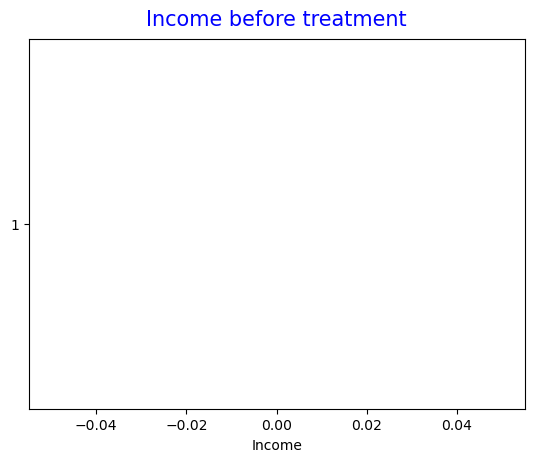

In [3]:
#detect Income outliers before treatment
#sns.boxplot(data=med_data[["Income"]], orient='h', color='red').set(title='Income before treatment')
plt.boxplot(med_data['Income'], vert=False)
plt.xlabel('Income')
plt.title('Income before treatment', fontsize=15, pad=10, color='blue')
plt.show()

In [15]:
#treatmeant of Income Outliers
#METHOD = UNIVARIATE STATISTICAL IMPUTATION: MEDIAN

#query how many results are outliers
inc_query = med_data.query('Income > 175000' and 'Income < 4000')
inc_query.info()

#impute outliers with univariate median imputation
med_data['Income'] = np.where(med_data['Income'] > 175000, np.nan, med_data['Income'])
med_data['Income'] = np.where(med_data['Income'] < 4000, np.nan, med_data['Income'])
med_data['Income'].fillna(med_data['Income'].median(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 4 to 9872
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          172 non-null    int64  
 1   CaseOrder           172 non-null    int64  
 2   Customer_id         172 non-null    object 
 3   Interaction         172 non-null    object 
 4   UID                 172 non-null    object 
 5   City                172 non-null    object 
 6   State               172 non-null    object 
 7   County              172 non-null    object 
 8   Zip                 172 non-null    int64  
 9   Lat                 172 non-null    float64
 10  Lng                 172 non-null    float64
 11  Population          172 non-null    float64
 12  Area                172 non-null    object 
 13  Timezone            172 non-null    object 
 14  Job                 172 non-null    object 
 15  Children            172 non-null    float64
 16  Age    

In [ ]:
#detect Income outliers after treatment
#sns.boxplot(data=med_data[["Income"]], orient='h', color='green').set(title='Income after treatment')
plt.boxplot(med_data['Income'], vert=False)
plt.xlabel('Income')
plt.title('Income after treatment', fontsize=15, pad=10, color='blue')
plt.show()

## 3.2 Outliers - Population

In [ ]:
#detect Population outliers before treatment
#sns.boxplot(data=med_data[["Population"]], orient='h', color='red').set(title='Population before treatment')
plt.boxplot(med_data['Population'], vert=False)
plt.xlabel('Population')
plt.title('Population before treatment', fontsize=15, pad=10, color='blue')
plt.show()

In [16]:
#treatmeant of Population Outliers
#METHOD = UNIVARIATE STATISTICAL IMPUTATION: MEDIAN

#query how many results are outliers
pop_query = med_data.query('Population > 100000' and 'Population < 20')
pop_query.info()

#impute outliers with univariate median imputation
med_data['Population'] = np.where(med_data['Population'] < 20, np.nan, med_data['Population'])
med_data['Population'] = np.where(med_data['Population'] > 100000, np.nan, med_data['Population'])
med_data['Population'].fillna(med_data['Population'].median(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 31 to 9584
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          56 non-null     int64  
 1   CaseOrder           56 non-null     int64  
 2   Customer_id         56 non-null     object 
 3   Interaction         56 non-null     object 
 4   UID                 56 non-null     object 
 5   City                56 non-null     object 
 6   State               56 non-null     object 
 7   County              56 non-null     object 
 8   Zip                 56 non-null     int64  
 9   Lat                 56 non-null     float64
 10  Lng                 56 non-null     float64
 11  Population          56 non-null     float64
 12  Area                56 non-null     object 
 13  Timezone            56 non-null     object 
 14  Job                 56 non-null     object 
 15  Children            56 non-null     float64
 16  Age    

In [ ]:
#detect Population outliers after treatment
plt.boxplot(med_data['Population'], vert=False)
plt.xlabel('Population')
plt.ylabel('Count')
plt.title('Population after treatment', fontsize=15, pad=10, color='blue')
plt.show()

## 3.3 Outliers - Children

In [ ]:
#detect outliers - Children
#sns.boxplot(data=med_data[["Children"]], orient='h', color='red').set(title='Children before treatment')
plt.boxplot(med_data['Children'], vert=False)
plt.xlabel('Children')
plt.title('Children before 1st treatment', fontsize=15, pad=10, color='blue')
plt.show()

In [18]:
#treatment of Children Outliers
#METHOD: EXCLUSION
children_outliers = med_data[(med_data['Children'] > 6)]
children_outliers.info()
med_data.drop(med_data[(med_data['Children'] > 6)].index, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 7 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          457 non-null    int64  
 1   CaseOrder           457 non-null    int64  
 2   Customer_id         457 non-null    object 
 3   Interaction         457 non-null    object 
 4   UID                 457 non-null    object 
 5   City                457 non-null    object 
 6   State               457 non-null    object 
 7   County              457 non-null    object 
 8   Zip                 457 non-null    int64  
 9   Lat                 457 non-null    float64
 10  Lng                 457 non-null    float64
 11  Population          457 non-null    float64
 12  Area                457 non-null    object 
 13  Timezone            457 non-null    object 
 14  Job                 457 non-null    object 
 15  Children            457 non-null    float64
 16  Age    

In [ ]:
#detect Children outliers after treatment
#sns.boxplot(data=med_data[["Children"]], orient='h', color='red').set(title='Children after initial treatment')
plt.boxplot(med_data['Children'], vert=False)
plt.xlabel('Children')
plt.title('Children after initial treatment', fontsize=15, pad=10, color='blue')
plt.show()

In [19]:
## Treatment of Children Outliers
## METHOD: EXCLUSION
children_outliers2 = med_data[(med_data['Children'] > 3)]
children_outliers = pd.concat([children_outliers, children_outliers2], axis='columns')
children_outliers.info()
med_data.drop(med_data[(med_data['Children'] > 3)].index, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 7 to 9996
Columns: 106 entries, Unnamed: 0 to Item8
dtypes: float64(52), object(54)
memory usage: 1.2+ MB


In [ ]:
## Detect Children outliers after treatment
#sns.boxplot(data=med_data[["Children"]], orient='h', color='green').set(title='Children after final treatment')
plt.boxplot(med_data['Children'], vert=False)
plt.xlabel('Children')
plt.title('Children after final treatment', fontsize=15, pad=10, color='blue')
plt.show()

## 3.4 Outliers - Age

In [ ]:
## Detect Outliers in Age
sns.boxplot(data=med_data[["Age"]], orient='h', color='green').set(title='Age showing no outliers')

## 3.5 Outliers - Initial_days

In [ ]:
## Detect Outliers in Initial_days
sns.boxplot(data=med_data[["Initial_days"]], orient='h', color='green').set(title='Initial_days showing no outliers')

## 3.6 Outliers - TotalCharge

In [ ]:
## Detect Outliers in TotalCharge
#sns.boxplot(data=med_data[["TotalCharge"]], orient='h', color='red').set(title='TotalCharge before treatment')
plt.boxplot(med_data['TotalCharge'], vert=False)
plt.xlabel('TotalCharge')
plt.title('TotalCharge before treatment', fontsize=15, pad=10, color='blue')
plt.show()

In [20]:
## Treatment of TotalCharge Outliers
## METHOD: MEAN
med_data['TotalCharge'] = np.where(med_data['TotalCharge'] > 21000, np.nan, med_data['TotalCharge'])
med_data['TotalCharge'].fillna(med_data['TotalCharge'].mean(), inplace=True)

In [ ]:
## Detect Outliers in TotalCharge after treatment
sns.boxplot(data=med_data[["TotalCharge"]], orient='h', color='green').set(title='TotalCharge after treatment')

## 3.7 Outliers - Additional_charges

In [ ]:
## Detect Additional_charges Outliers
sns.boxplot(data=med_data[["Additional_charges"]], orient='h', 
            color='green').set(title='Additional_charges before treatment')

## 3.8 Outliers - VitD_levels

In [ ]:
## Detect VitD_levels Outliers
#sns.boxplot(data=med_data[["VitD_levels"]], orient='h', color='red').set(title='VitD_levels before treatment')
plt.boxplot(med_data['VitD_levels'], vert=False)
plt.xlabel('VitD_levels')
plt.title('VitD_levels before treatment', fontsize=15, pad=10, color='blue')
plt.show()

In [21]:
#treatment of VitD_levels Outliers
#METHOD: MEAN
med_data['VitD_levels'] = np.where(med_data['VitD_levels'] > 40, np.nan, med_data['VitD_levels'])
med_data['VitD_levels'].fillna(med_data['VitD_levels'].mean(), inplace=True)

In [ ]:
#detect VitD_levels Outliers after treatment
#sns.boxplot(data=med_data[["VitD_levels"]], orient='h', color='green').set(title='VitD_levels after treatment')
plt.boxplot(med_data['VitD_levels'], vert=False)
plt.xlabel('VitD_levels')
plt.title('VitD_levels after treatment', fontsize=15, pad=10, color='blue')
plt.show()

# 4. Re-expression of Categorical Variables

## 4.1 Re-express Education variable

In [ ]:
## Re-expression of Categorical Variable: Education
## METHOD = ORDINAL ENCODING 

#view unique variables in Education column
print(med_data.Education.unique())
   
#create new education_numeric column
med_data['education_numeric'] = med_data['Education']

#create Education dictionary 
dict_edu = {"education_numeric": 
           {"No Schooling Completed": 0, 
            "Nursery School to 8th Grade": 9, 
            "9th Grade to 12th Grade, No Diploma": 11, 
            "Regular High School Diploma": 12, 
            "GED or Alternative Credential": 12, 
            "Professional School Degree": 12, 
            "Some College, Less than 1 Year": 13, 
            "Some College, 1 or More Years, No Degree": 13, 
            "Associate's Degree": 14, 
            "Bachelor's Degree": 16, 
            "Master's Degree": 18, 
            "Doctorate Degree": 22}}

#use the dictionary to replace the variable's values
med_data.replace(dict_edu, inplace=True)

#view unique variables in education_numeric column
print(med_data.education_numeric.unique())
print(dict_edu)

## 4.2 Re-express Complication_risk variable

In [ ]:
## Re-expression of Categorical Variable: Complication_risk
## METHOD = ORDINAL ENCODING 

#view unique variables in Complication_risk column
print(med_data.Complication_risk.unique())
   
#create new complication_risk_numeric column
med_data['complication_risk_numeric'] = med_data['Complication_risk']

#create Education dictionary 
dict_comp_risk = {"complication_risk_numeric": 
           {"Low": 1,
            "Medium": 2,
            "High": 3}}

#use the dictionary to replace the variable's values
med_data.replace(dict_comp_risk, inplace=True)

#view unique variables in education_numeric column
print(med_data.complication_risk_numeric.unique())
print(dict_comp_risk)

## 4.3 Re-express Employment, Marital, Gender, Area, Initial_admin, and Services variables

In [ ]:
## Re-expression of Categorical Variables: Employment, Marital, Gender, Area, Initial_admin, Services
## METHOD = ONE HOT ENCODING 

#get dummy variables for Area
dummies_area = pd.get_dummies(med_data.Area)
print(dummies_area)

#get dummy variables for Employment
dummies_emp = pd.get_dummies(med_data.Employment)
print(dummies_emp)

#get dummy variables for Marital
dummies_mar = pd.get_dummies(med_data.Marital)
print(dummies_mar)

#get dummy variables for Gender
dummies_gen = pd.get_dummies(med_data.Gender)
print(dummies_gen)

#get dummy variables for Initial_admin
dummies_iad = pd.get_dummies(med_data.Initial_admin)
print(dummies_iad)

#get dummy variables for Services
dummies_svc = pd.get_dummies(med_data.Services)
print(dummies_svc)

In [ ]:
## Merge DataFrames into 1 large DF

original_df = med_data
med_data = pd.concat([med_data, 
                      dummies_area, 
                      dummies_emp, 
                      dummies_mar, 
                      dummies_gen, 
                      dummies_iad, 
                      dummies_svc], axis='columns')
print(original_df.shape)
print(med_data.shape)

In [ ]:
## Export cleaned data to csv file

med_data.to_csv("~/Downloads/d206-medical/medical_cleaned_data.csv")

# 5. Principal Component Analysis

In [22]:
#create new dataset for PCA
md = med_data[['Lat', 'Lng', 'Income', 'VitD_levels', 'Initial_days', 'TotalCharge', 'Additional_charges']]

#normalize the data
md_normalized = (md - md.mean())/md.std()

#apply PCA
pca = PCA(n_components=md.shape[1])

#print pca
print(pca)

PCA(n_components=7)


In [4]:
#fit PCA 
pca.fit(md_normalized)

#transform PCA
md_pca = pd.DataFrame(pca.transform(md_normalized), 
                      columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

#get PC loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'],
                        index=md.columns)
print(loadings)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
#create covariance matrix
cov_matrix = np.dot(md_normalized.T, md_normalized)/md.shape[0]

#create eigenvalues
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

#plot eigenvalues
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot', fontsize=20, pad=10, color='blue')
plt.axhline(y=1, color='red')
plt.axvline(x=3, color='green')
plt.show()